In [1]:
# imports
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import sys

from q_dms_ttr_paper.paths import DATA_PATH
from q_dms_ttr_paper.titration import compute_mg_1_2, normalize_data, normalized_hill_equation


# general figure tweaks
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["font.size"] = 16
# to fight the theme
plt.rcParams["figure.facecolor"] = "white"

In [2]:
def generate_titration_plot(g, color='blue'):
    r = compute_mg_1_2(list(g["mg_conc"]), list(g["gaaa_avg"]))
    name = g["name"].iloc[0]
    #print(g[["mg_conc", "gaaa_avg"]])
    norm_data = -normalize_data(np.array(g['gaaa_avg'])) + 1
    plt.title(f"{name} - {g.iloc[0]['dg']} - mg1/2 - {round(r[0][0], 3)}, +/- {round(r[1][0], 3)}")
    plt.scatter(g["mg_conc"], norm_data, color=color)
    xs, ys = [], []
    for j in np.arange(0, 40, 0.25):
        p = r[0]
        y = normalized_hill_equation(j, p[0], p[1])
        xs.append(j)
        ys.append(y)
    plt.plot(xs, ys, color=color)
    plt.fill_between(xs, ys-r[1][0], ys+r[1][0], alpha=0.2, lw=0)
    plt.ylim(-0.05, 1.1)

In [3]:
df = pd.read_json(f"{DATA_PATH}/processed/mttr6_data_full.json")
#df = df[df["mg_conc"] != 5.0]


In [4]:
df_sub = df[df["run_name"] == "2022_08_26_mtt6_set1-3_MgTitra_KU_seq"]

In [5]:
print(df_sub["rna_name"].unique())

['mtt6_mutations_set_1_50mM_NaC_40_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_20_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_15_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_10_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_7.5_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_6.5_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_5_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_3.5_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_2.5_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_1.5_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_1_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_0.75_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_0.5_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_0.25_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_0.1_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_0_mM_Mg2+'
 'mtt6_mutations_set_2_50mM_NaC_40_mM_Mg2+'
 'mtt6_mutations_set_2_50mM_NaC_20_mM_Mg2+'
 'mtt6_mutations_set_2_50mM_NaC_15_mM_Mg2+'
 'mtt6_mutations_set_2_50mM_NaC_10_mM_Mg2+'
 'mtt6_mutations_set_2_50mM_NaC_7.5_mM_Mg2+'
 'mtt6_mutations_set_2_50mM_NaC_6.5_mM_Mg2+'
 'mtt6_mutations_set_2

## CAUGG_CCUAAA

/opt/homebrew/Caskroom/miniconda/base/envs/py3/lib/python3.8/site-packages/q_dms_ttr_paper/titration.py:17: RuntimeWarning: invalid value encountered in power
  return ((conc / K) ** n) / (1 + (conc / K) ** n)


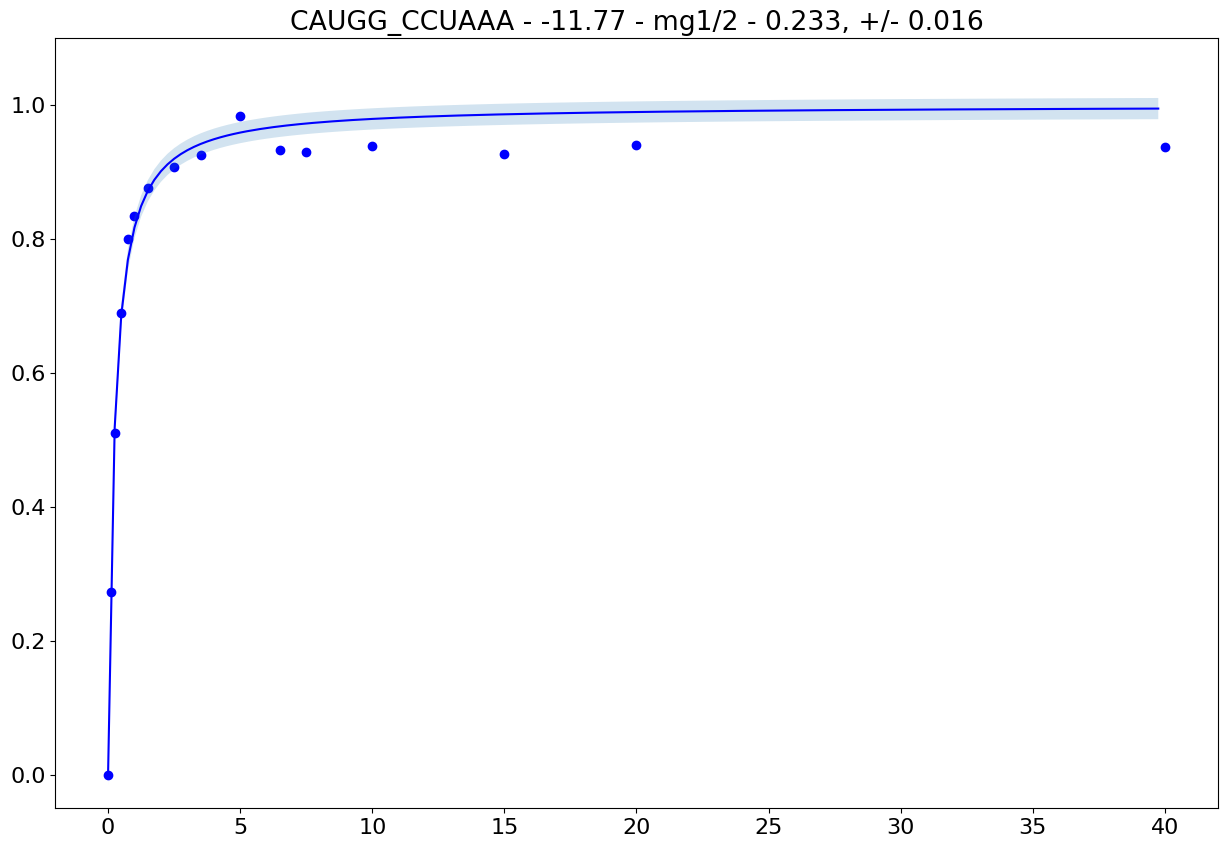

In [7]:
generate_titration_plot(df[df["name"] == "CAUGG_CCUAAA"])

## section 2
